In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
import math

lena_rgb = cv2.imread("images/Lena.bmp")
baboon = cv2.imread('images/Baboon.bmp')
harris = cv2.imread('images/harris.jpg')

# Convert the image from BGR to RGB
lena_rgb = cv2.cvtColor(lena_rgb, cv2.COLOR_BGR2RGB)
baboon_rgb = cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB)
harris = cv2.cvtColor(harris, cv2.COLOR_BGR2GRAY)
sl = cv2.imread('images/sl.jpg')
sm = cv2.imread('images/sm.jpg')
sr = cv2.imread('images/sr.jpg')

# part 1.1.1

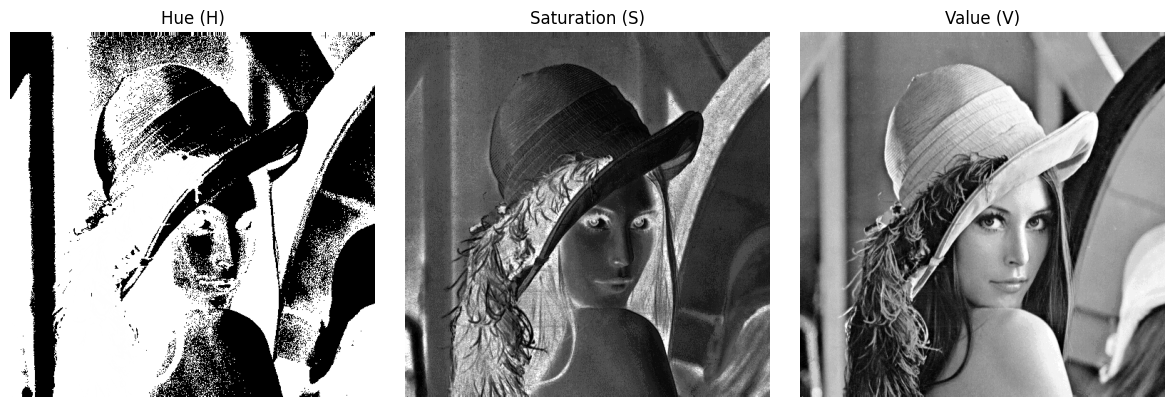

In [5]:
# Convert RGB image to HSV 
def rgb_to_hsv(rgb):
    rgb = rgb.astype(np.uint16)
    r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]

    min_rgb = np.minimum(r, np.minimum(g, b))

    v = (r+g+b) / 3

    s = 1 - 3 / (r+g+b) * min_rgb
    r = list(r)
    g = list(g)
    b = list(b)
    h = np.zeros_like(r)
    for i in range(512):
        for j in range(512):
            R = int(r[i][j])
            G = int(g[i][j])
            B = int(b[i][j])

            teta = math.acos( (0.5 * ((R-G)+(R-B)) / ((R-G)**2 + (R-B)*(G-B))**0.5) )
            if B < G:
                h[i][j] = teta
            else:
                h[i][j] = 360 - teta
    
    
    hsv = np.stack((h, s, v), axis=-1)

    return hsv

# Convert Lena RGB image to HSV manually
lena_hsv = rgb_to_hsv(lena_rgb)

# Display the H, S, and V components as grayscale images
h, s, v = lena_hsv[:, :, 0], lena_hsv[:, :, 1], lena_hsv[:, :, 2]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(h, cmap='gray')
plt.title('Hue (H)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation (S)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Value (V)')
plt.axis('off')

plt.tight_layout()
plt.show()

# part 1.1.2

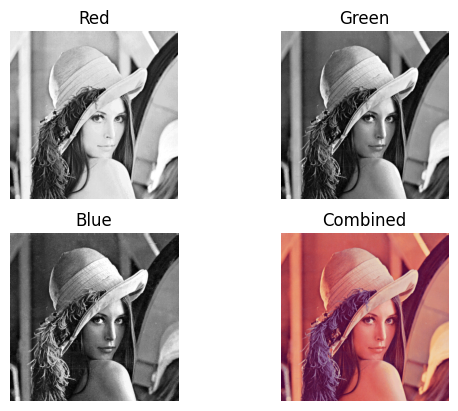

In [6]:
# Convert RGB to the new color space manually
def rgb_to_new_color_space(rgb):
    r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
    new_component_1 = r * 0.8
    new_component_2 = g * 0.8
    new_component_3 = b * 0.8
    new_color_space = np.stack((new_component_1, new_component_2, new_component_3), axis=-1)
    return new_color_space

# Convert Lena RGB image to the new color space manually
lena_new_color_space = rgb_to_new_color_space(lena_rgb)
# Convert Lena RGB image to the new color space
lena_rgb_changed = lena_rgb * 0.8

# Display the new color space components as grayscale images
component_1, component_2, component_3 = lena_new_color_space[:, :, 0], lena_new_color_space[:, :, 1], lena_new_color_space[:, :, 2]

fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(component_1, cmap='gray')
axes[0, 0].set_title('Red')
axes[0, 0].axis('off')

axes[0, 1].imshow(component_2, cmap='gray')
axes[0, 1].set_title('Green')
axes[0, 1].axis('off')

axes[1, 0].imshow(component_3, cmap='gray')
axes[1, 0].set_title('Blue')
axes[1, 0].axis('off')

axes[1, 1].imshow(lena_rgb)
axes[1, 1].set_title('Combined')
axes[1, 1].axis('off')

plt.show()


# part 1.2.1

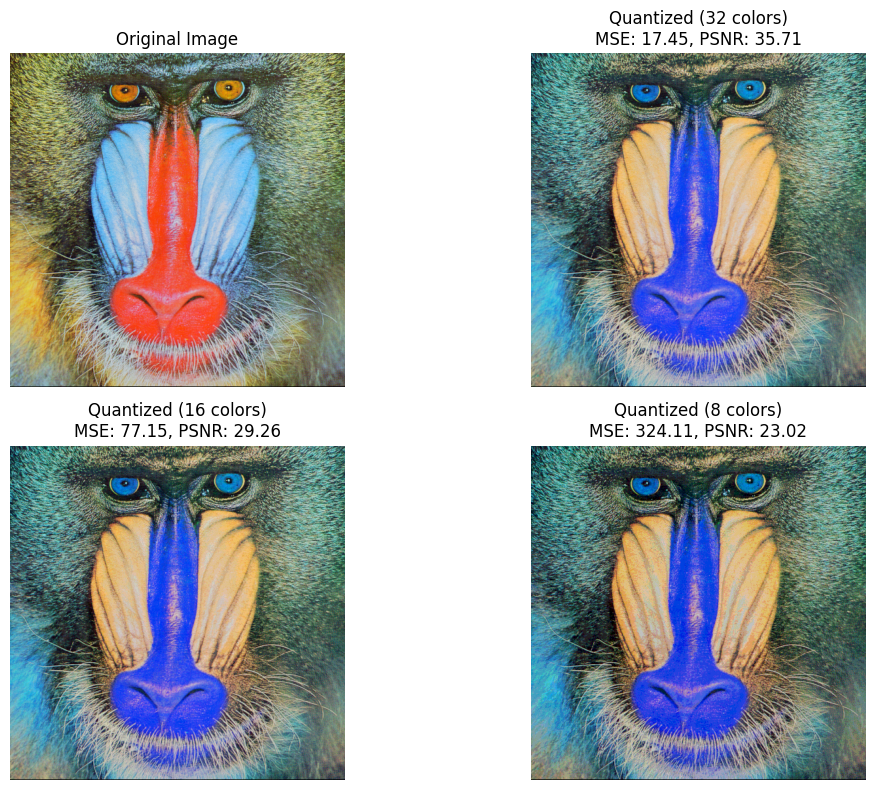

In [53]:
min_intensity = np.min(baboon)
max_intensity = np.max(baboon)
intensity_range = max_intensity - min_intensity + 1
splitor_8 = intensity_range / 8
splitor_16 = intensity_range / 16
splitor_32 = intensity_range / 32

# Quantize the image into 8 intensity levels
quantized_8 = np.floor(baboon  / splitor_8).astype(int)
# Rescale the quantized image back to the original intensity range
quantized_8 *= int(splitor_8)

# Quantize the image into 16 intensity levels
quantized_16 = np.floor(baboon  / splitor_16).astype(int)
# Rescale the quantized image back to the original intensity range
quantized_16 *= int(splitor_16)

# Quantize the image into 32 intensity levels
quantized_32 = np.floor(baboon  / splitor_32).astype(int)
# Rescale the quantized image back to the original intensity range
quantized_32 *= int(splitor_32)

# Calculate MSE and PSNR for each quantized image
mse_32 = mean_squared_error(baboon, quantized_32)
psnr_32 = peak_signal_noise_ratio(baboon, quantized_32, data_range=255)

mse_16 = mean_squared_error(baboon, quantized_16)
psnr_16 = peak_signal_noise_ratio(baboon, quantized_16, data_range=255)

mse_8 = mean_squared_error(baboon, quantized_8)
psnr_8 = peak_signal_noise_ratio(baboon, quantized_8, data_range=255)

# Display the original image and the quantized images
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(baboon_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(quantized_32)
plt.title('Quantized (32 colors)\nMSE: {:.2f}, PSNR: {:.2f}'.format(mse_32, psnr_32))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(quantized_16)
plt.title('Quantized (16 colors)\nMSE: {:.2f}, PSNR: {:.2f}'.format(mse_16, psnr_16))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(quantized_8)
plt.title('Quantized (8 colors)\nMSE: {:.2f}, PSNR: {:.2f}'.format(mse_8, psnr_8))
plt.axis('off')

plt.tight_layout()
plt.show()


# part 2.1.1

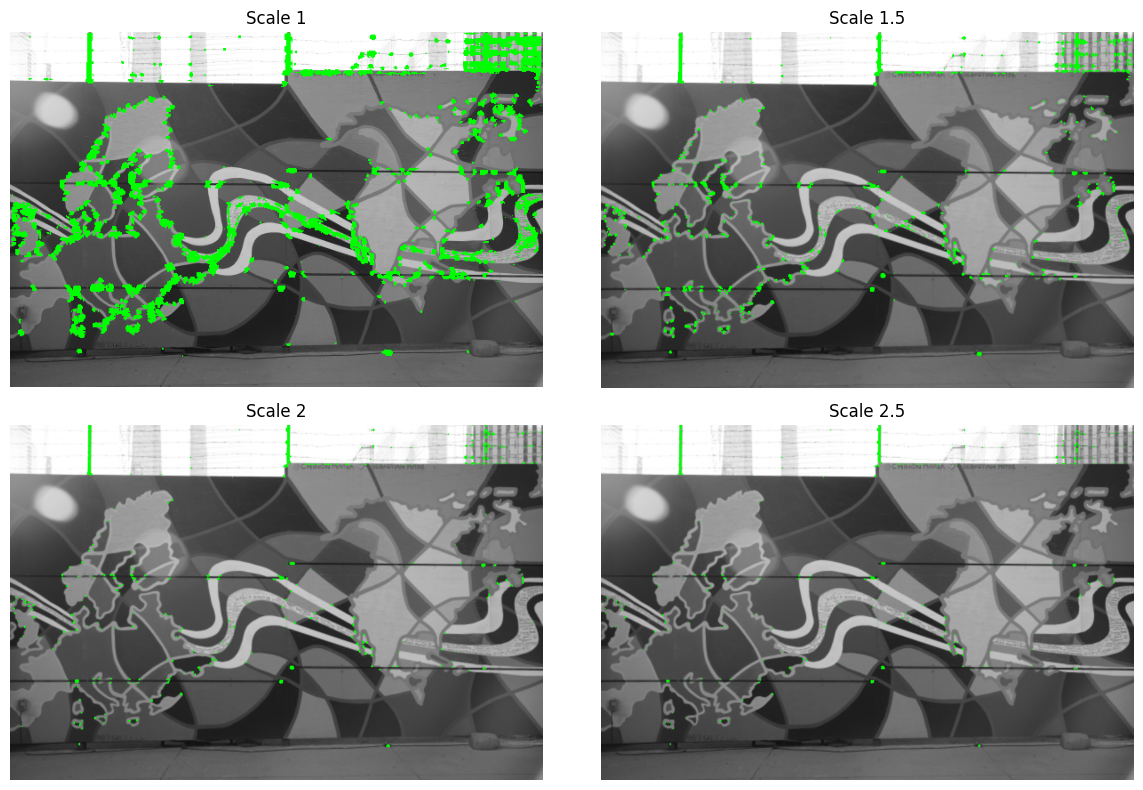

In [2]:
def find_harris_corners(input_img, k, window_size, threshold):
    
    corner_list = []
    output_img = cv2.cvtColor(input_img.copy(), cv2.COLOR_GRAY2RGB)
    
    offset = int(window_size/2)
    y_range = input_img.shape[0] - offset
    x_range = input_img.shape[1] - offset
    
    
    dy, dx = np.gradient(input_img)
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2
    
    
    for y in range(offset, y_range):
        for x in range(offset, x_range):
            
            #Values of sliding window
            start_y = y - offset
            end_y = y + offset + 1
            start_x = x - offset
            end_x = x + offset + 1
            
            #The variable names are representative to 
            #the variable of the Harris corner equation
            windowIxx = Ixx[start_y : end_y, start_x : end_x]
            windowIxy = Ixy[start_y : end_y, start_x : end_x]
            windowIyy = Iyy[start_y : end_y, start_x : end_x]
            
            #Sum of squares of intensities of partial derevatives 
            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()

            #Calculate determinant and trace of the matrix
            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            
            #Calculate r for Harris Corner equation
            r = det - k*(trace**2)

            if r > threshold:
                corner_list.append([x, y])
                output_img[y,x] = (0,255,0)
    
    return corner_list, output_img 

k = 0.04
window_size = 5
threshold = 5000000

# Define the scale values
scales = [1, 1.5, 2, 2.5]

# Initialize an empty list to store the interest points
interest_points = []

output_images = []
state = False
# Apply Harris Corner detection at different scales
count = 0
for scale in scales:
    # Resize the grayscale image
    resized_image = cv2.resize(harris, None, fx=scale, fy=scale)
    count += 1
    # Calculate the Harris response using the cornerHarris function
    corner_list, corner_img = find_harris_corners(resized_image, k, window_size, threshold) 
    corner_file = open(f'corners_list{count}.txt', 'w')
    corner_file.write('x ,\t y, \t r \n')
    for i in range(len(corner_list)):
        corner_file.write(str(corner_list[i][0]) + ' , ' + str(corner_list[i][1]) + ' , ' + '\n')
    corner_file.close()
    output_images.append(corner_img)
    new_interest_points = []
    if state:
        for element in corner_list:
            search_element = [int(element[0] / scale), int(element[1] / scale)]
            if search_element in interest_points:
                new_interest_points.append(search_element)
        interest_points = new_interest_points
    else:
        interest_points = corner_list
        state = True

# Display the original image and the quantized images
plt.figure(figsize=(12, 8))

for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.imshow(output_images[i-1])
    plt.title(f'Scale {scales[i-1]}')
    plt.axis('off')


plt.tight_layout()
plt.show()

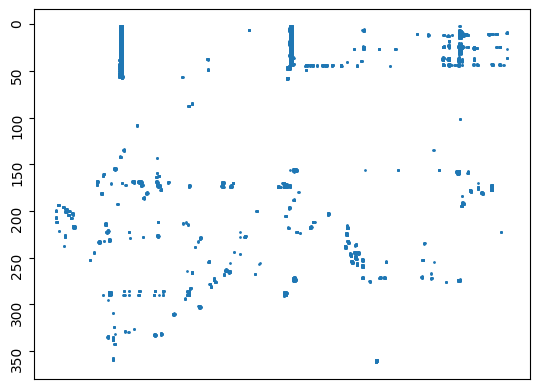

In [27]:
x = []
y = []

for element in interest_points:
    x.append(element[0])
    y.append(element[1])
plt.scatter(x, y, s=1)

# Rotate the y-axis tick labels
plt.xticks([])
plt.yticks(rotation=90)

# Invert the y-axis
plt.gca().invert_yaxis()
plt.show()

# part 2.2.1

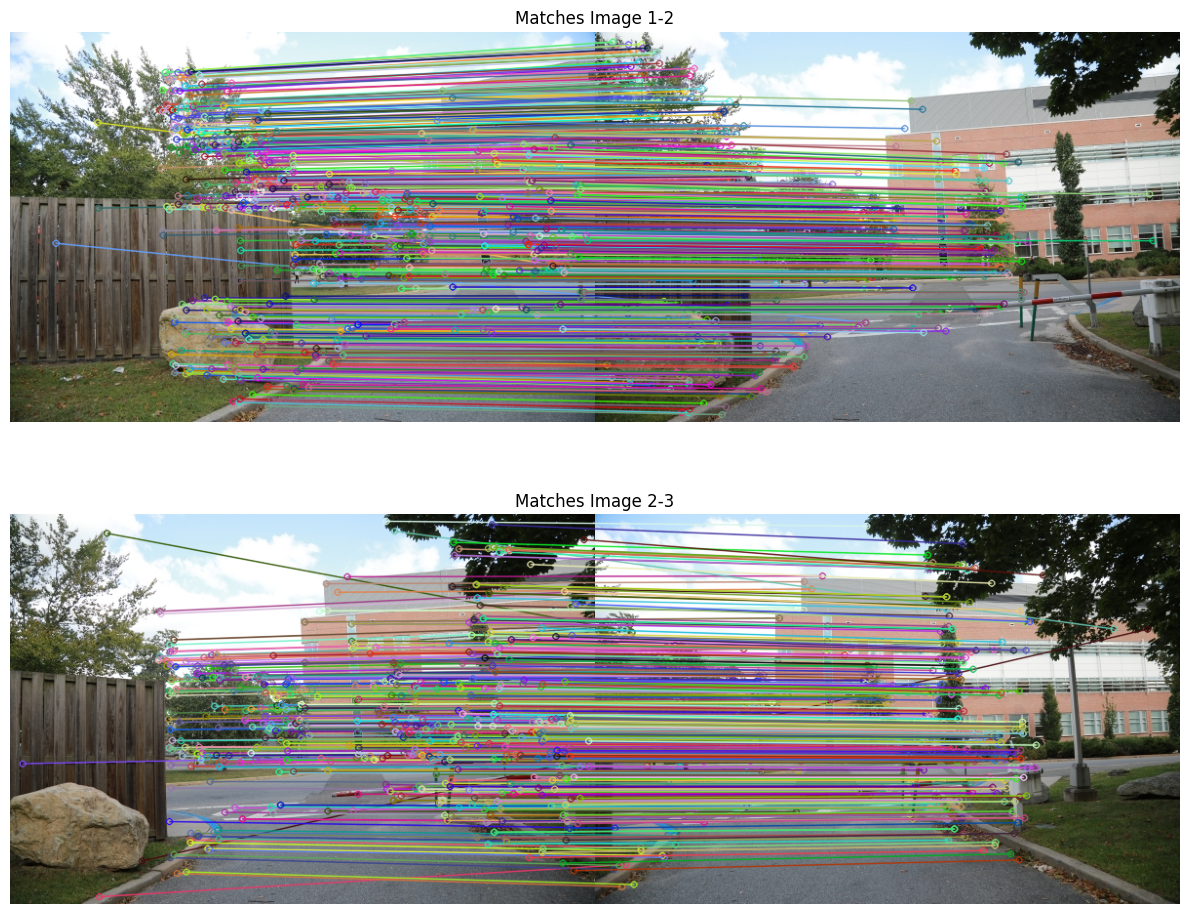

In [75]:
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(sl, None)
keypoints2, descriptors2 = sift.detectAndCompute(sm, None)
keypoints3, descriptors3 = sift.detectAndCompute(sr, None)

# Perform feature matching
matcher = cv2.BFMatcher()
matches1to2 = matcher.knnMatch(descriptors1, descriptors2, k=2)
matches2to3 = matcher.knnMatch(descriptors2, descriptors3, k=2)

# Apply ratio test to filter good matches
good_matches1to2 = []
for m, n in matches1to2:
    if m.distance < 0.7 * n.distance:
        good_matches1to2.append(m)

good_matches2to3 = []
for m, n in matches2to3:
    if m.distance < 0.7 * n.distance:
        good_matches2to3.append(m)

# Draw and display the matched keypoints
matched_image1to2 = cv2.drawMatches(sl, keypoints1, sm, keypoints2, good_matches1to2, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
matched_image2to3 = cv2.drawMatches(sm, keypoints2, sr, keypoints3, good_matches2to3, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Convert images to RGB for Matplotlib display
matched_image1to2_rgb = cv2.cvtColor(matched_image1to2, cv2.COLOR_BGR2RGB)
matched_image2to3_rgb = cv2.cvtColor(matched_image2to3, cv2.COLOR_BGR2RGB)

# Set figure size
fig = plt.figure(figsize=(12, 10))

# Display the matched keypoints using Matplotlib
ax1 = fig.add_subplot(2, 1, 1)
ax1.imshow(matched_image1to2_rgb)
ax1.set_title('Matches Image 1-2')
ax1.axis('off')

ax2 = fig.add_subplot(2, 1, 2)
ax2.imshow(matched_image2to3_rgb)
ax2.set_title('Matches Image 2-3')
ax2.axis('off')

plt.tight_layout()
plt.show()

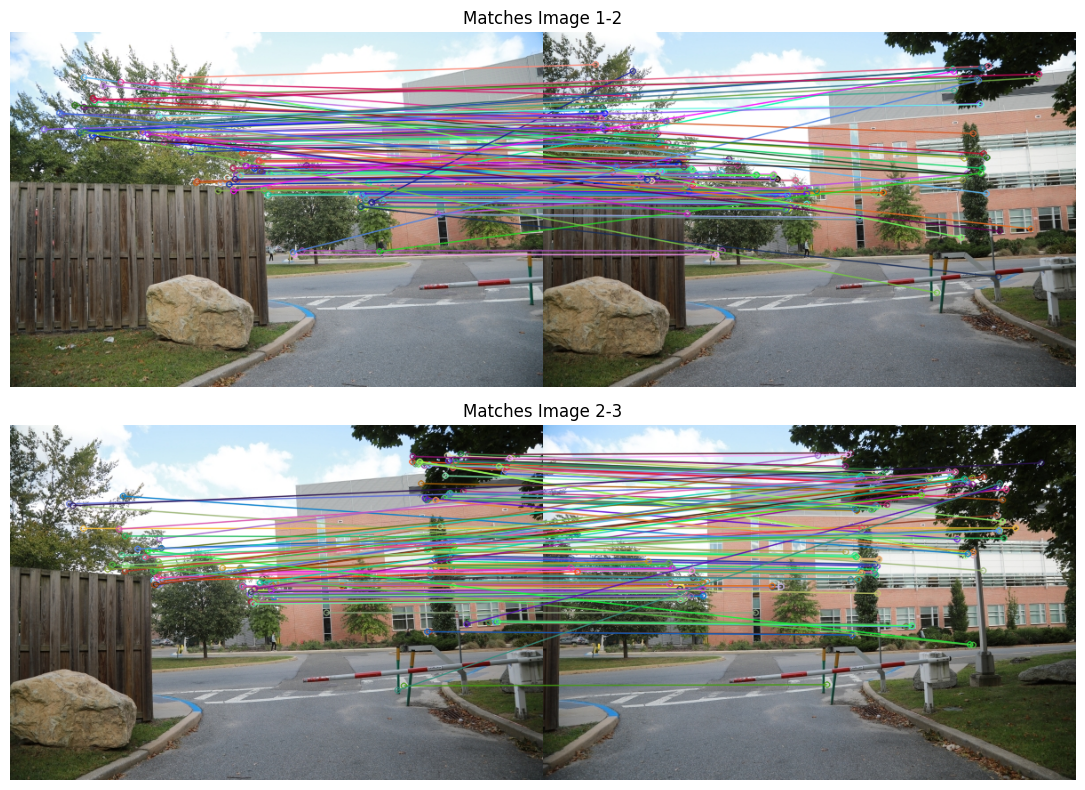

In [88]:
# Create the ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = orb.detectAndCompute(sl, None)
keypoints2, descriptors2 = orb.detectAndCompute(sm, None)
keypoints3, descriptors3 = orb.detectAndCompute(sr, None)

# Perform feature matching between Image 1 and Image 2
matcher1to2 = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches1to2 = matcher1to2.match(descriptors1, descriptors2)

# Sort the matches by distance
matches1to2 = sorted(matches1to2, key=lambda x: x.distance)

# Perform feature matching between Image 2 and Image 3
matcher2to3 = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches2to3 = matcher2to3.match(descriptors2, descriptors3)

# Sort the matches by distance
matches2to3 = sorted(matches2to3, key=lambda x: x.distance)

# Draw and display the matched keypoints
matched_image1to2 = cv2.drawMatches(sl, keypoints1, sm, keypoints2, matches1to2, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
matched_image2to3 = cv2.drawMatches(sm, keypoints2, sr, keypoints3, matches2to3, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Convert images to RGB for Matplotlib display
matched_image1to2_rgb = cv2.cvtColor(matched_image1to2, cv2.COLOR_BGR2RGB)
matched_image2to3_rgb = cv2.cvtColor(matched_image2to3, cv2.COLOR_BGR2RGB)

# Set figure size
fig = plt.figure(figsize=(12, 8))

# Display the matched keypoints using Matplotlib
ax1 = fig.add_subplot(2, 1, 1)
ax1.imshow(matched_image1to2_rgb)
ax1.set_title('Matches Image 1-2')
ax1.axis('off')

ax2 = fig.add_subplot(2, 1, 2)
ax2.imshow(matched_image2to3_rgb)
ax2.set_title('Matches Image 2-3')
ax2.axis('off')

plt.tight_layout()
plt.show()